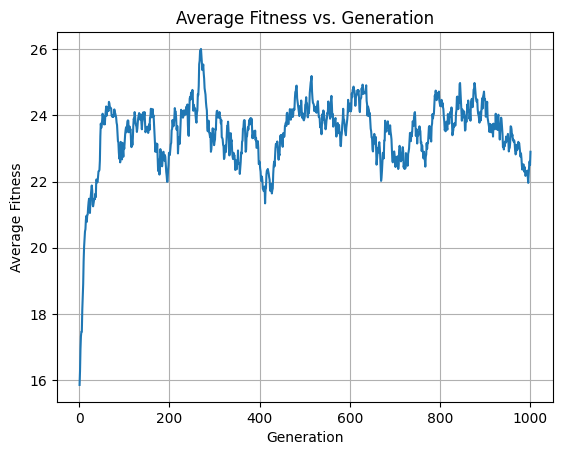

In [1]:
import random
import matplotlib.pyplot as plt

POPULATION_SIZE = 100
STRING_LENGTH = 30
MUTATION_RATE = 0.01
NUM_GENERATIONS = 1000
TARGET_STRING = [1] * STRING_LENGTH  # Target string of all 1s

def generate_random_string(length):
    return [random.choice([0, 1]) for _ in range(length)]

def initial_population(size, length):
    return [generate_random_string(length) for _ in range(size)]

def fitness(string):
    return sum(1 for i in range(len(string)) if string[i] == TARGET_STRING[i])

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutation(string):
    mutated_string = string[:]
    for i in range(len(mutated_string)):
        if random.random() < MUTATION_RATE:
            mutated_string[i] = 1 if mutated_string[i] == 0 else 0
    return mutated_string

def average_fitness(population):
    return sum(fitness(string) for string in population) / len(population)

def genetic_algorithm():
    population = initial_population(POPULATION_SIZE, STRING_LENGTH)
    average_fitnesses = []

    for generation in range(NUM_GENERATIONS):
        # Calculate fitness for each individual
        population_fitness = [fitness(string) for string in population]

        # Select parents for crossover
        selected_parents = random.choices(population, weights=population_fitness, k=POPULATION_SIZE)

        # Perform crossover and mutation to create new generation
        new_population = []
        for i in range(0, POPULATION_SIZE, 2):
            child1, child2 = crossover(selected_parents[i], selected_parents[i+1])
            new_population.extend([mutation(child1), mutation(child2)])

        population = new_population
        average_fitnesses.append(average_fitness(population))

    return average_fitnesses

average_fitnesses = genetic_algorithm()

plt.plot(range(1, NUM_GENERATIONS + 1), average_fitnesses)
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
plt.title('Average Fitness vs. Generation')
plt.grid(True)
plt.show()
